# Initilaize library and import sample image


C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


(-0.5, 599.5, 699.5, -0.5)

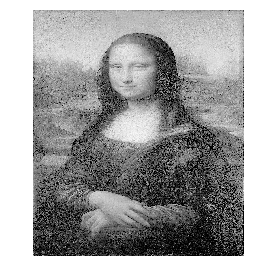

In [2]:
from skimage import io, data, color, exposure
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
img = io.imread('first_image.jpg')
io.imshow(img[:,:,0])
plt.axis('off')

# Bit plane slicing
## extract single bit layers for the image.
## you can visualize the contribution of each layer in the final image

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


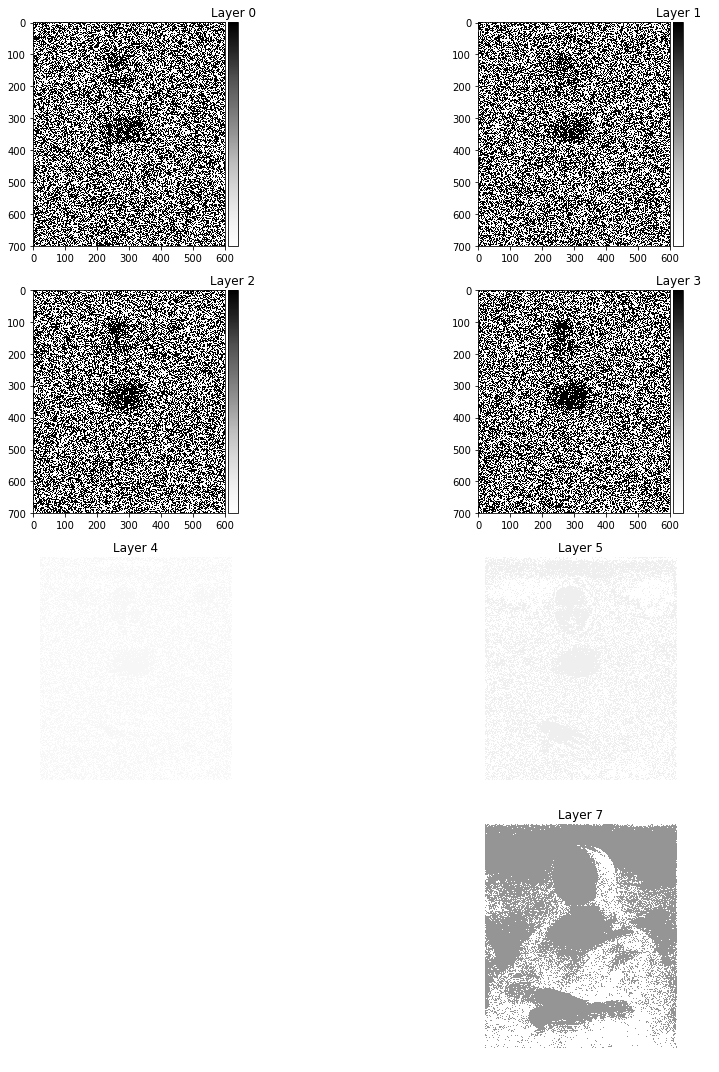

In [3]:
# plane slicing

plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,2,i+1)
    io.imshow((img[:,:,0] & (2**(i))), cmap="Greys")
    plt.axis('off')
    plt.title('Layer {}'.format(i))

# Read Second image to hide 

In [4]:
# Read second image
img_say_no = io.imread('second_image.jpg')
two_layers = img_say_no[:,:,0]

for i in range(len(img_say_no[:,1,0])):
    two_layers[i,:] = img_say_no[i,:,0] >> 6
    
#io.imshow(two_layers)
#print(two_layers[2:5,2:5])

# hide second image into the last two bits of original image 

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


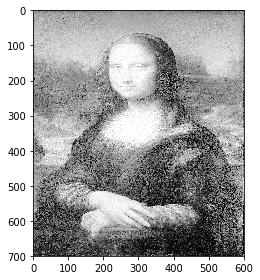

In [5]:
six_layers = img[:,:,0] & 0b11111100
final_image = six_layers | two_layers
io.imshow(final_image)

In [ ]:
# Decode/Extract hidden image

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


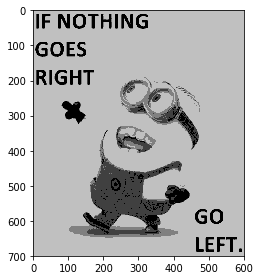

In [6]:
#decode image
hidden_image = final_image
for i in range(len(final_image)):
    hidden_image[i,:] = final_image[i,:] << 6
io.imshow(hidden_image)

# Questions

# Thank you